In [1]:
import pandas as pd

In [4]:
df=pd.read_csv("C:/Users/abhis/OneDrive/Documents/datascience/delivery_time.csv")

In [5]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
df.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [8]:
df.info

<bound method DataFrame.info of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [9]:
df.shape

(21, 2)

In [10]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [11]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [12]:
#EDA


In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Delivery Time')

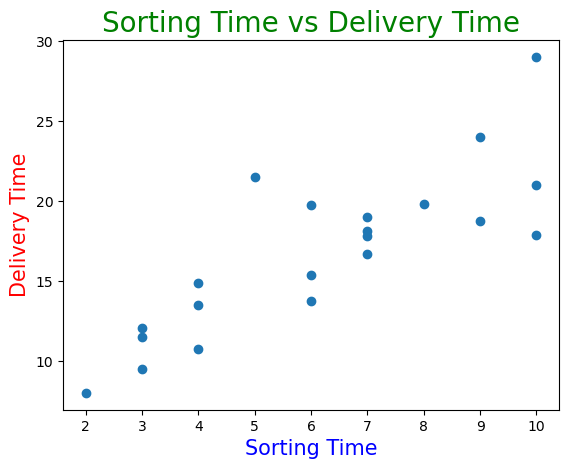

In [14]:
plt.scatter(df["Sorting Time"],df["Delivery Time"])
plt.title("Sorting Time vs Delivery Time", color="green", size=20)
plt.xlabel("Sorting Time", c="blue", size=15)

plt.ylabel("Delivery Time", c="red", size=15)


In [15]:
d1=df["Sorting Time"].value_counts()

<Axes: >

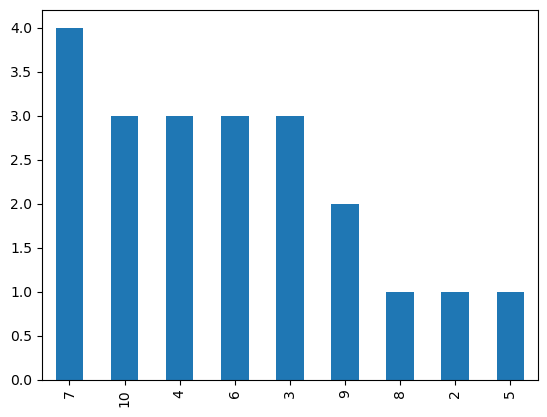

In [16]:
d1.plot(kind="bar")

<Axes: >

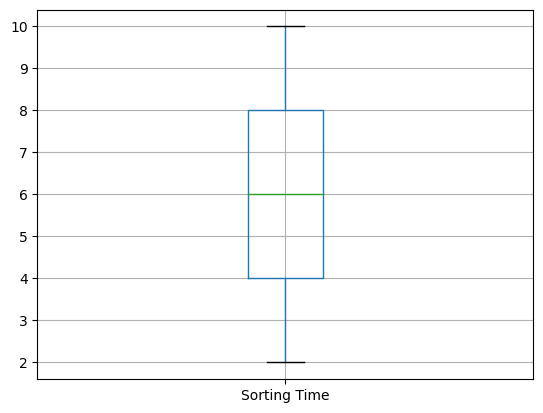

In [17]:
df.boxplot(column=["Sorting Time"])

<Axes: >

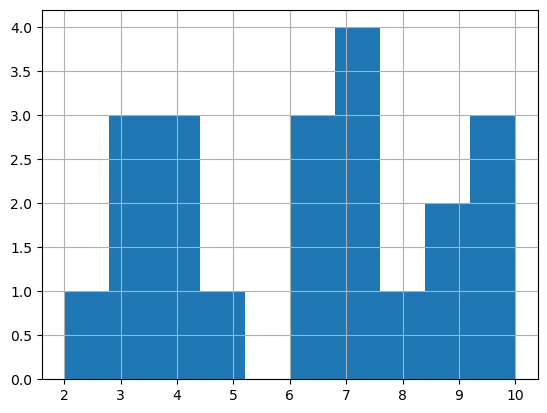

In [18]:
df["Sorting Time"].hist()

In [19]:
#kurtosis and skew

In [20]:
from scipy.stats import skew

In [21]:
from scipy.stats import kurtosis

In [22]:
skew(df["Sorting Time"])

0.043680994983108075

In [23]:
kurtosis(df["Sorting Time"])

-1.1653901357029155

In [24]:
skew(df["Delivery Time"])

0.326702631656106

In [25]:
kurtosis(df["Delivery Time"])

-0.02558576894549036

In [26]:
d2=df["Delivery Time"].value_counts()

<Axes: >

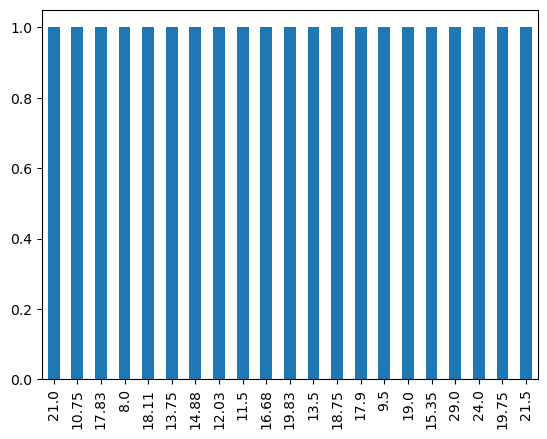

In [27]:
d2.plot(kind="bar")

<Axes: >

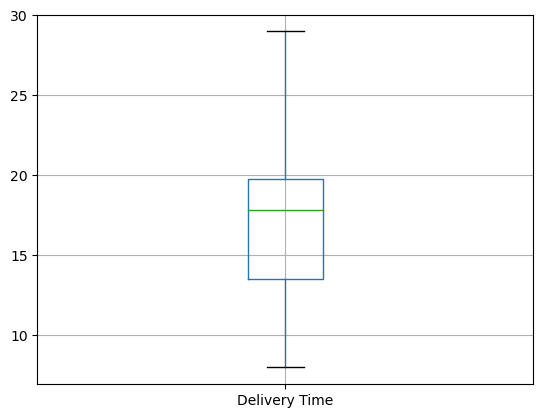

In [28]:
df.boxplot(column=["Delivery Time"])

<Axes: >

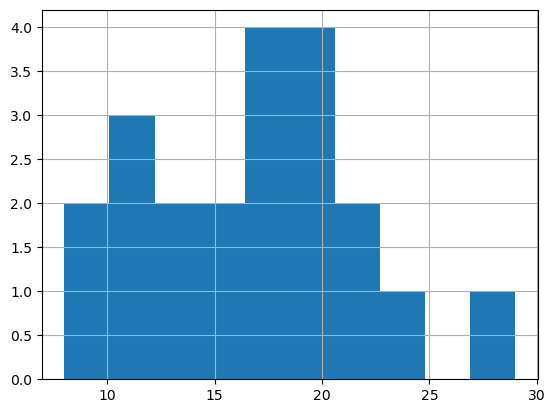

In [29]:
df["Delivery Time"].hist()

In [30]:
#heatmap


In [31]:
import seaborn as sn

In [32]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

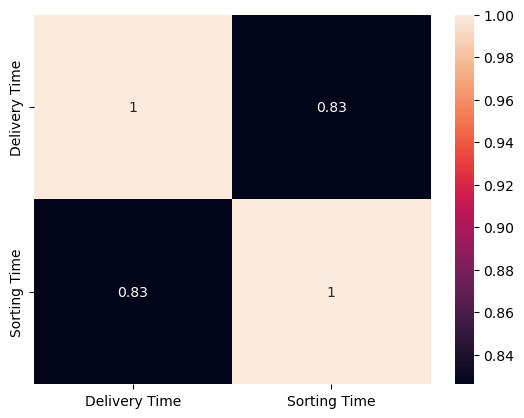

In [33]:
sn.heatmap(df.corr(),annot=True)

In [34]:
#pairplot


In [58]:
import seaborn as sns

In [59]:
sns.set_style(style="darkgrid")

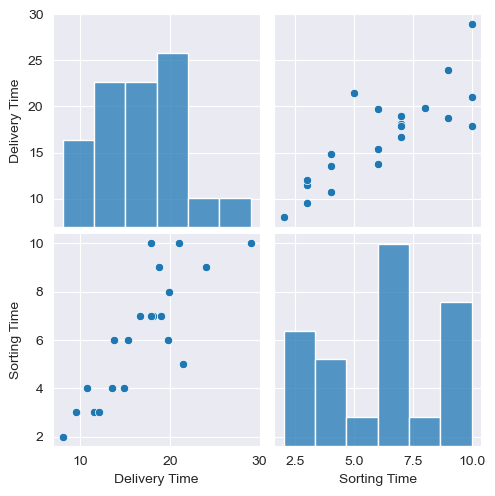

In [60]:
sns.pairplot(df)

In [61]:
#Distance plot

In [62]:
import seaborn as sns

C:\Users\abhis\AppData\Local\Temp\ipykernel_2372\1648472574.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Delivery Time"])


<Axes: xlabel='Delivery Time', ylabel='Density'>

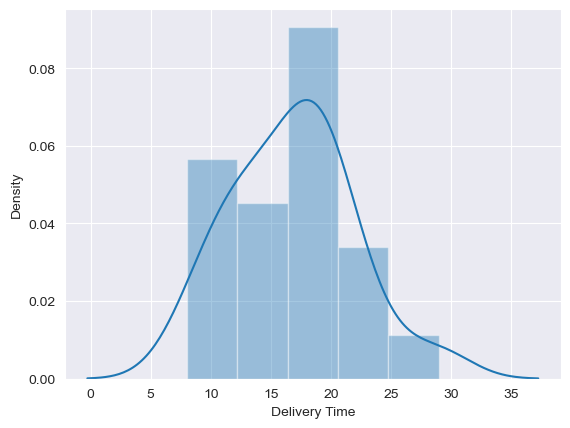

In [63]:
sns.distplot(df["Delivery Time"])

C:\Users\abhis\AppData\Local\Temp\ipykernel_2372\2169179401.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

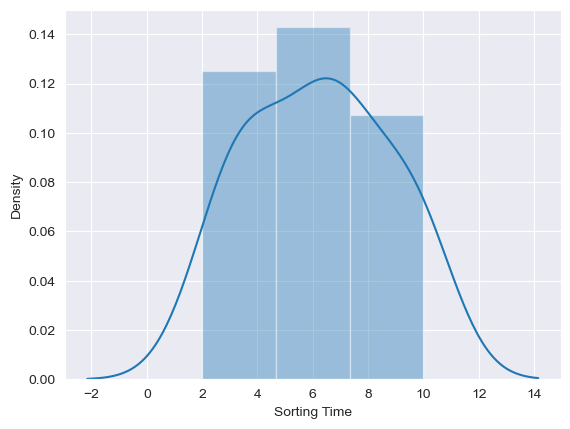

In [64]:
sns.distplot(df["Sorting Time"])

In [65]:
df = df.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)

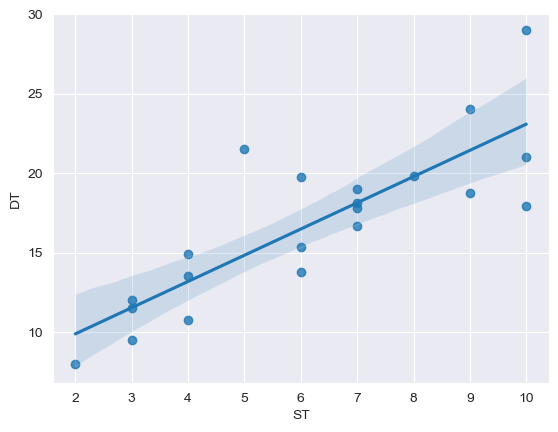

In [66]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = df).fit()
sns.regplot(x="ST", y="DT", data=df);


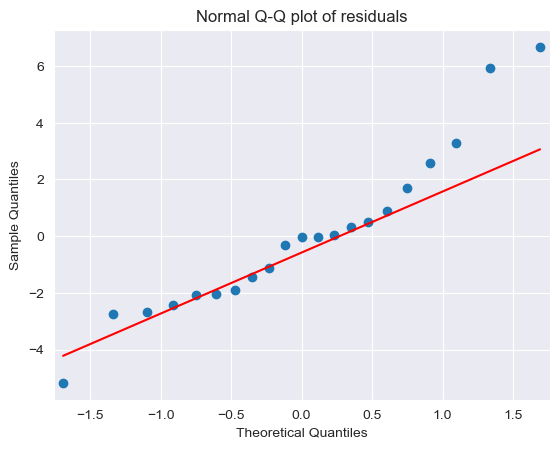

In [67]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()


0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

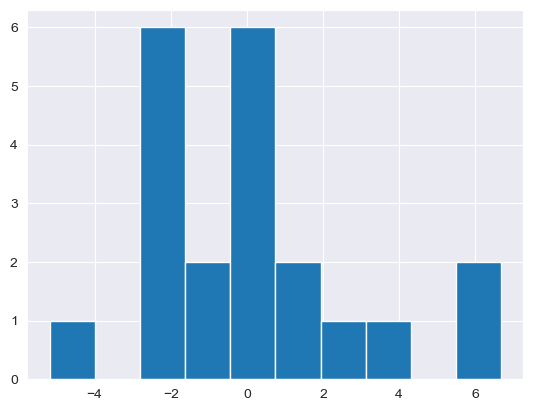

In [68]:
model.resid.hist()
model.resid

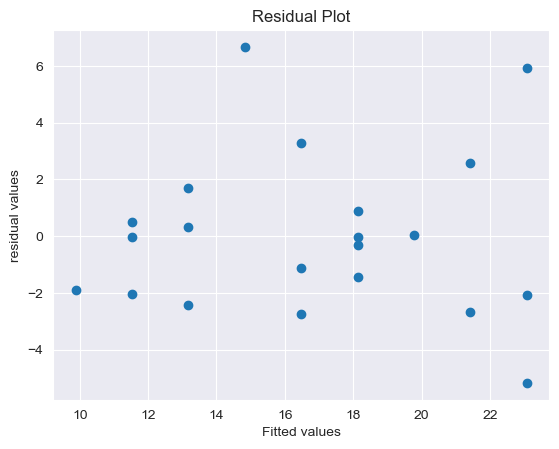

In [69]:
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues,model.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('residual values')
plt.show()


In [ ]:
#log transformation

C:\Users\a856994\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\a856994\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


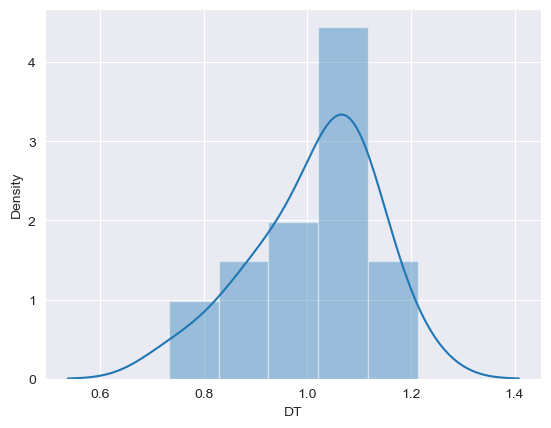

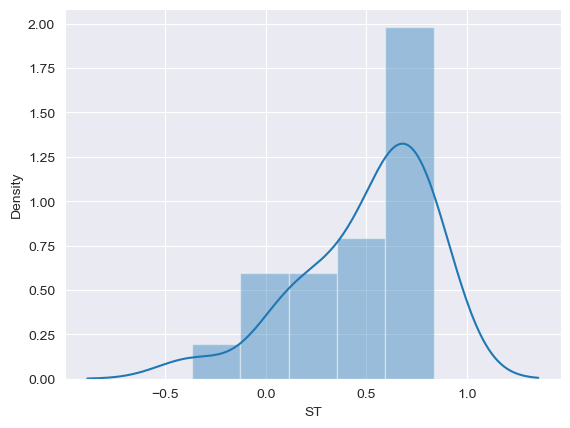

<Figure size 640x480 with 0 Axes>

In [282]:
data_1=df
data_1['DT'] = np.log(data_1['DT'])
data_1['ST'] = np.log(data_1['ST'])
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

In [71]:
#square root transformation

C:\Users\a856994\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\a856994\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


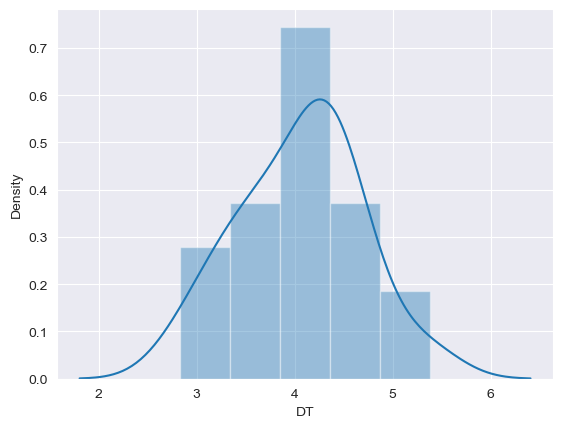

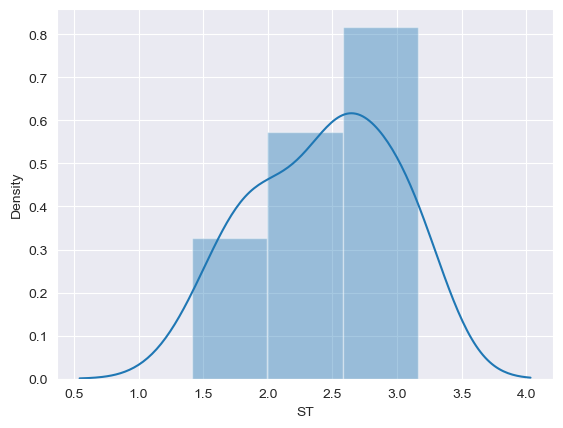

<Figure size 640x480 with 0 Axes>

In [92]:
data_1=df
data_1['DT'] = data_1['DT']**(1/2)
data_1['ST'] = data_1['ST']**(1/2)
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

In [ ]:
#square transformation

C:\Users\abhis\AppData\Local\Temp\ipykernel_2372\2136133222.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['DT'])
C:\Users\abhis\AppData\Local\Temp\ipykernel_2372\2136133222.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['ST'])


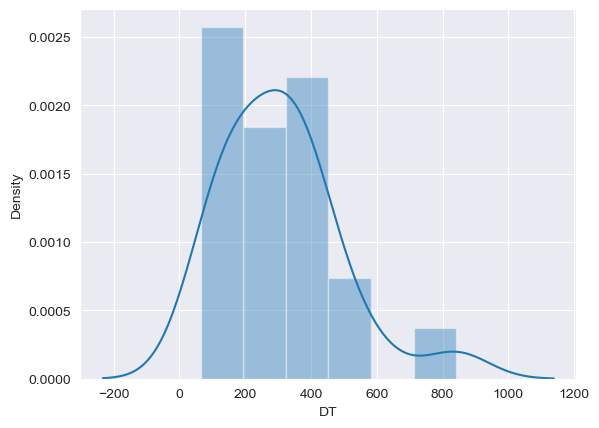

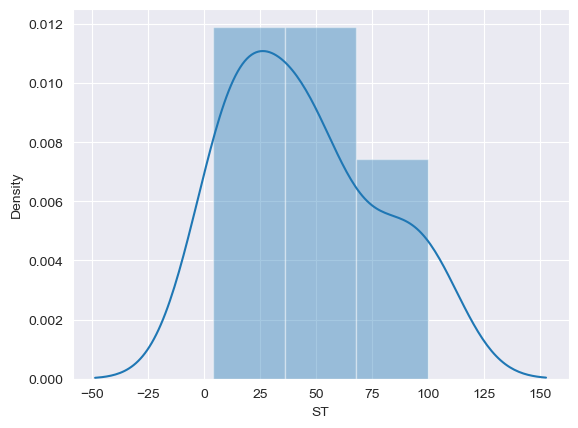

<Figure size 640x480 with 0 Axes>

In [70]:
data_1=df
data_1['DT'] = data_1['DT']**2
data_1['ST'] = data_1['ST']**2
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

In [72]:
#reciprocal transformation

C:\Users\abhis\AppData\Local\Temp\ipykernel_2372\2450025039.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['DT'])
C:\Users\abhis\AppData\Local\Temp\ipykernel_2372\2450025039.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['ST'])


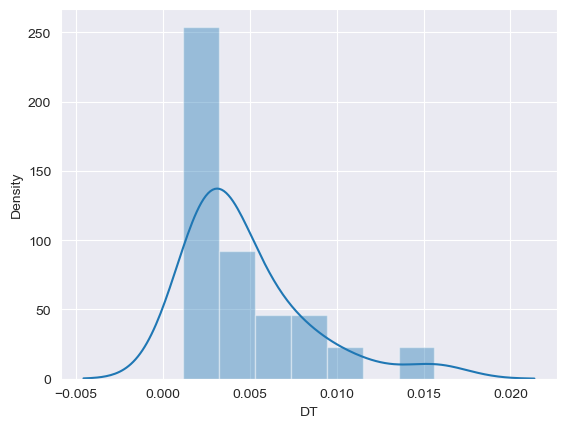

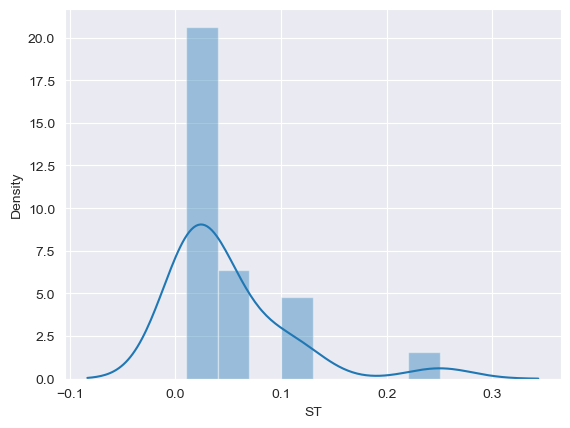

<Figure size 640x480 with 0 Axes>

In [73]:
data_1=df
data_1['DT'] = 1/data_1['DT']
data_1['ST'] = 1/data_1['ST']
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

In [74]:
data_1['DT']

0     0.002268
1     0.005487
2     0.002564
3     0.001736
4     0.001189
5     0.004244
6     0.002770
7     0.011080
8     0.003121
9     0.002844
10    0.002543
11    0.008653
12    0.003594
13    0.007561
14    0.006910
15    0.004516
16    0.005289
17    0.003049
18    0.015625
19    0.003146
20    0.002163
Name: DT, dtype: float64

In [75]:
#Data Transformation

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
SS=StandardScaler()

In [78]:
SS=SS.fit_transform(df.iloc[:,0:])

In [79]:
SS=pd.DataFrame(SS)

In [80]:
SS

,0,1
0,-0.729934,-0.712514
1,0.205859,0.227005
2,-0.643860,-0.394370
3,-0.884416,-0.670537
4,-1.043429,-0.712514
5,-0.155417,-0.394370
6,-0.583868,-0.526254
7,1.831702,1.096930
8,-0.481865,-0.712514
9,-0.562253,-0.670537


In [81]:
#SPLIT X AND Y

In [82]:
X=SS.iloc[:,0]

In [83]:
X=pd.DataFrame(X)

In [84]:
X

,0
0,-0.729934
1,0.205859
2,-0.643860
3,-0.884416
4,-1.043429
5,-0.155417
6,-0.583868
7,1.831702
8,-0.481865
9,-0.562253


In [85]:
Y=SS.iloc[:,1]

In [86]:
Y=pd.DataFrame(Y)

In [87]:
Y

,1
0,-0.712514
1,0.227005
2,-0.394370
3,-0.670537
4,-0.712514
5,-0.394370
6,-0.526254
7,1.096930
8,-0.712514
9,-0.670537


In [88]:
from sklearn.model_selection import train_test_split

In [89]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [90]:
X_train.shape

(14, 1)

In [91]:
X_train

,0
3,-0.884416
18,3.152717
16,0.148389
13,0.808852
2,-0.643860
9,-0.562253
20,-0.760235
4,-1.043429
12,-0.344305
7,1.831702


In [65]:

X_test.shape

(7, 1)

In [66]:
Y_train.shape

(14, 1)

In [67]:
Y_test.shape

(7, 1)

In [68]:
#model fitting

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
LR=LinearRegression()

In [71]:
LR.fit(X_train,Y_train)

LinearRegression()

In [72]:
LR.coef_

array([[0.76265712]])

In [73]:
LR.intercept_

array([-0.11449788])

In [74]:
# prediction

In [75]:
Y_pred_train=LR.predict(X_train)

In [76]:
Y_pred_test=LR.predict(X_test)

In [77]:
Y_pred_test

array([[ 0.53365917],
       [ 0.08862408],
       [-0.40876808],
       [-0.62127618],
       [ 0.05628589],
       [-0.33639213],
       [-1.04475248]])

In [78]:
Y_pred_train

array([[ 0.99563332],
       [-1.46822877],
       [-0.58277834],
       [-0.92925894],
       [ 0.34116995],
       [ 0.18717857],
       [ 0.61065486],
       [ 1.76559022],
       [-0.13158359],
       [-1.2372417 ],
       [ 0.35348926],
       [-0.84764351],
       [ 0.0455065 ],
       [ 0.22567641]])

In [79]:
#model evalution

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
mse1=mean_squared_error(Y_train,Y_pred_train)

In [82]:
mse2=mean_squared_error(Y_test,Y_pred_test)

In [83]:
print("Mean Squared error of training data is",mse1)

Mean Squared error of training data is 0.24257425049525322


In [84]:
print("Mean Squared error of test dta is",mse2)

Mean Squared error of test dta is 0.5194022888070974


In [85]:
import numpy as np

In [86]:
print("Root mean squared error of train data is",np.sqrt(mse1).round(2))

Root mean squared error of train data is 0.49


In [87]:
print("Root mean squared error of test data is",np.sqrt(mse2).round(2))

Root mean squared error of test data is 0.72


In [88]:
from sklearn.metrics import r2_score

In [89]:
rsquare_train=r2_score(Y_train,Y_pred_train)

In [90]:
rsquare_train

0.7539121518197861

In [91]:
rsquare_test=r2_score(Y_test,Y_pred_test)

In [268]:
rsquare_test

0.4881416805292439